# РК №1

# Поддубный Михаил Вар 15

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./googleplaystore.csv', sep=",")

In [6]:
# Общая информация о датасете
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# количество пропусков
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Пропуски в стобцах, кроме Rating, незначительны, поэтому можем смело удалить строки, содержащие такие пропуски

In [13]:
data = data.dropna(subset=['Type'])

In [14]:
data = data.dropna(subset=['Content Rating'])

In [16]:
data = data.dropna(subset=['Current Ver'])

In [17]:
data = data.dropna(subset=['Android Ver'])

In [18]:
# количество пропусков после удаления
data.isna().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### Видно, что мы удалили несколько строк с пропусками

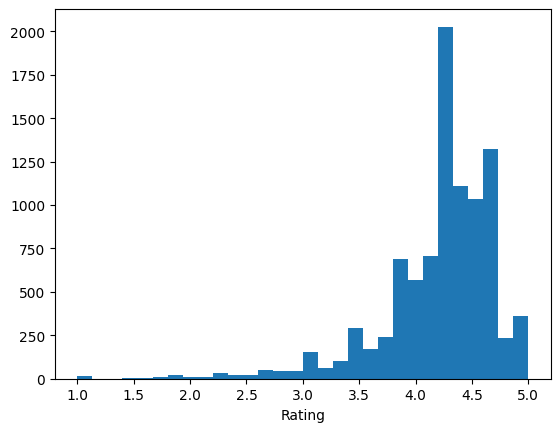

In [23]:
# посмотрим как выглядит наша колонка на гистограмме с пропусками
plt.hist(data['Rating'], 30)
plt.xlabel('Rating')
plt.show()

### Заполним пропуски медианой

In [32]:
from sklearn.impute import SimpleImputer
data['Rating'].mean().round(1), data['Rating'].median()

(4.2, 4.3)

### Так как большинство оценок находятся в среднем арифметическом оценки, то такое заполнение не сильно повлияет на данные в целом

In [33]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

In [34]:
# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
data['Rating'] = imp_median.fit_transform(data[['Rating']])

In [36]:
# убедимся, что пропущенных значений не осталось
data.Rating.isna().sum()

0

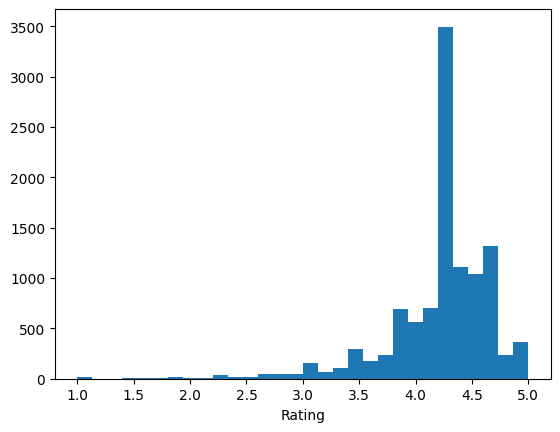

In [38]:
# посмотрим на распределение после заполнения пропусков
plt.hist(data['Rating'], 30)
plt.xlabel('Rating')
plt.show()

In [39]:
# количество пропусков после удаления
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Мы убрали все пропуски в датасете